# 第五题：实现层次聚类，并与其他聚类算法进行对比（选做）

实验内容：
1. 实现三种形式的层次聚类（最小距离、最大距离、平均距离）
2. 至少选择两个数据集
3. 在这两个数据集上运行自己实现的层次聚类算法和sklearn的KMeans，GMM，DBSCAN，共4个聚类算法
4. 计算外部指标FMI和NMI
5. 绘制4种聚类的聚类效果

In [19]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 生成数据集

In [20]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 1500, random_state = 170)

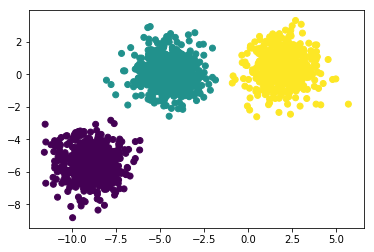

In [21]:
plt.scatter(X[:, 0], X[:, 1], c = y)

In [22]:
def compute_distance(X, y):
    distance = np.sqrt(np.sum((X-y)**2,axis=1))
    return distance

In [23]:
class myAggregativeClustering:
    
    def __init__(self,n_clusters,linkage):
        self.n_clusters = n_clusters
        self.linkage = linkage
        self.X = None
    
    def fit(self,X):
        
        # 一开始把每一个点看作一个类
        self.X = X.copy()
        self.X = np.concatenate((np.array([[x for x in range(len(X))]]).T,self.X),axis=1)
        
        # 直到到达指定的类簇数为止
        labels = self.X[:,0]
        print(len(labels))
        while(len(set(labels.tolist())) != self.n_clusters):
            
            # set.size don't change
            print(len(set(labels.tolist())))
            
            min_tag = 0
            distance_list = []
            
            # 求每一个类到其他类的距离
            for label in labels:
                A = self.X[self.X[:,0] == label,:]
                A = A[:,1:]
                list_distance = []
                
                for i in range(0,len(A)):
                    distances = compute_distance(self.X[:,1:],A[i,:])
                    # 为了避免之后取ｍｉｎ出错让相同行的值取maxsize
                    distances[np.where(distances == 0)] = sys.maxsize
                    list_distance.append(distances)
                
                #　Ａ类中点到Ｂ类中距离的最小值
                if(self.linkage == 'min'):
                    min_distance = list_distance[0]
                    for i in range(1,len(list_distance)):
                        min_distance = get_min(min_distance,list_distance[i])
                    distance_list.append(min_distance)
                    
                #　Ａ类中点到Ｂ类中距离的最大值
                elif(self.linkage == 'max'):
                    max_distance = list_distance[0]
                    for i in range(1,len(list_distance)):
                        max_distance = get_max(max_distance,list_distance[i])
                    distance_list.append(max_distance)
                        
                #　Ａ类中点到Ｂ类中距离的平均值
                elif(self.linkage == 'avg'):
                    distance_sum = list_distance[0]
                    for i in range(1,len(list_distance)):
                        distance_sum += list_distance[i] 
                    distance_list.append(np.mean(distance_sum))
                    
            # 选取距离最小的类
            min_distance = sys.maxsize
            min_arg = 0
            min_pointer = 0
            for i in range(0,len(distance_list)):
                if np.min(distance_list[i]) < min_distance:
                    min_arg = np.where(distance_list == np.min(distance_list[i]))[0][0]
                    min_pointer = i
                    
            label_min = self.X[min_arg,0]
            
            # 将对应类别更改
            for i in range(0,len(self.X)):
                if self.X[i,0] == label_min:
                    self.X[i,0] = labels[i]
            
            # 更新ｌａｂｅｌｓ
            labels = self.X[:,0]                    
            
    def get_pridict():
        return self.X[:0].T
    
    # 将两个矩阵中最小的部分进行合并
    def get_min(A_in,B_in):
        
        A = A_in.copy()
        B = B_in.copy()
        
        temp1 = A>B
        A[temp1] = 0
        temp2 = A<B
        B[temp2] = 0
        
        return A+B
    
    # 将两个矩阵中最大的地方进行合并
    def get_max(A,B):
        
        A = A_in.copy()
        B = B_in.copy()
        
        temp1 = A<B
        A[temp1] = 0
        temp2 = A>B
        B[temp2] = 0
        
        return A+B        

In [24]:
model = myAggregativeClustering(2,"min")

In [25]:
model.fit(X)

1500
1500
1500
1500


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score

In [ ]:
print(normalized_mutual_info_score(y, model.get_pridict))
print(fowlkes_mallows_score(y, model.get_pridict))